
### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features


----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку.

**Оценка**:

***DeadLine - 21.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.




### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0,
    ),
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

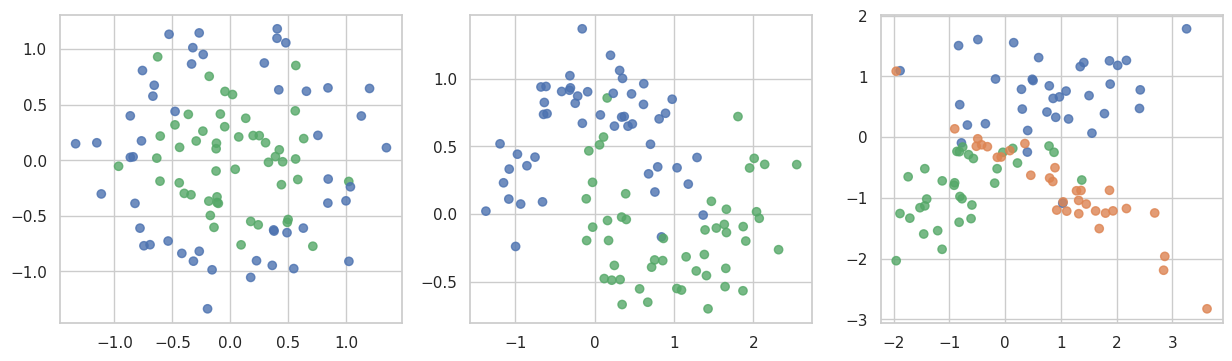

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

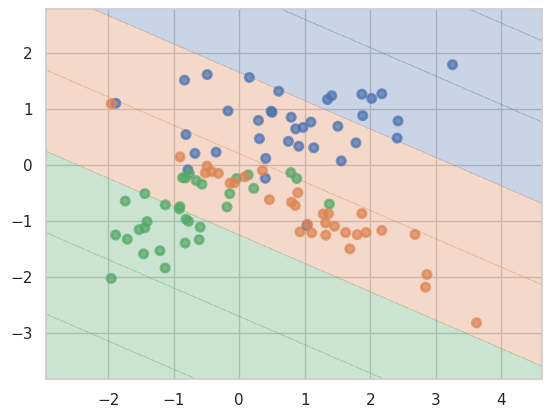

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Результаты обучения и оценки Decision Trees:

Dataset: Circles
  Accuracy on train: 1.0000
  Accuracy on test:  0.7333
  Вывод: Дерево сильно переобучилось.
----------------------------------------
Dataset: Moons
  Accuracy on train: 1.0000
  Accuracy on test:  0.8667
  Вывод: Дерево сильно переобучилось.
----------------------------------------
Dataset: Classification (3 classes)
  Accuracy on train: 1.0000
  Accuracy on test:  0.8333
  Вывод: Дерево сильно переобучилось.
----------------------------------------


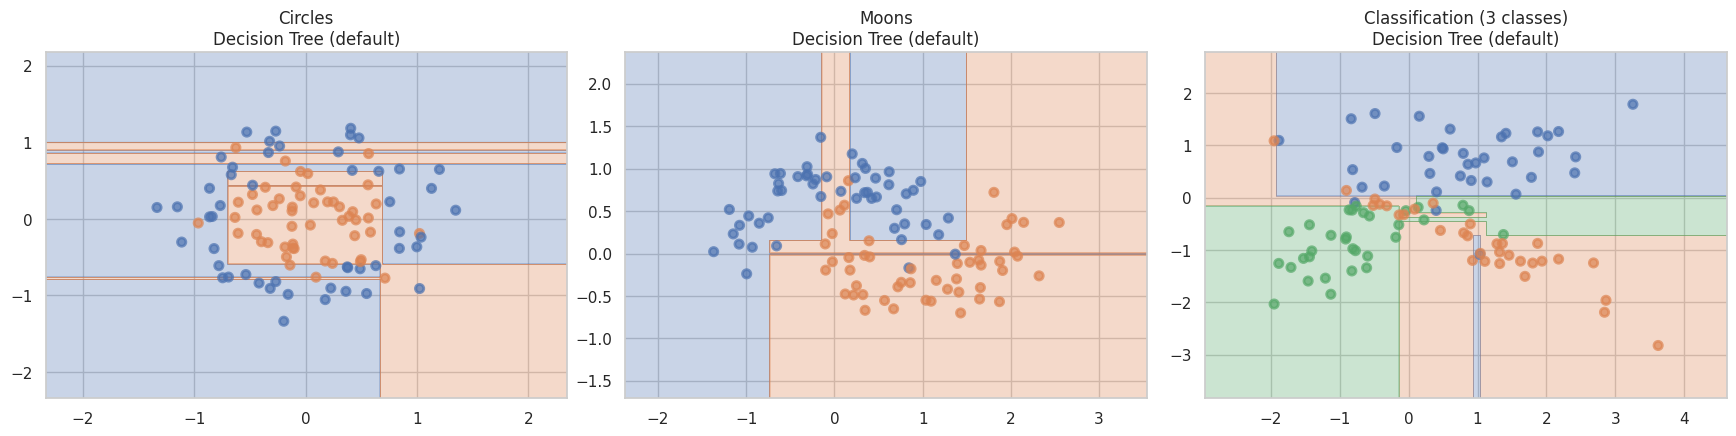

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons, make_circles, make_classification

# Настройки визуализации
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

# Генерация синтетических датасетов
datasets_data = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0,
    ),
]
dataset_names = ["Circles", "Moons", "Classification (3 classes)"]


def plot_surface(clf: DecisionTreeClassifier, X: np.ndarray, y: np.ndarray, ax: plt.Axes, title: str = "") -> None:
    """
    Description:
    ---------------
        Строит разделяющую поверхность классификатора и отображает точки датасета.
        Функция гарантирует корректное цветовое представление независимо от значений меток классов.

    Args:
    ---------------
        clf: Обученный классификатор
        X: Массив признаков данных
        y: Массив меток классов
        ax: Объект AxesSubplot для отрисовки графика
        title: Заголовок графика (опционально)

    Returns:
    ---------------
        None

    Examples:
    ---------------
        >>> from sklearn.linear_model import LogisticRegression
        >>> X_train, y_train = make_classification(n_classes=2, n_features=2, n_samples=100)
        >>> model = LogisticRegression().fit(X_train, y_train)
        >>> fig, ax = plt.subplots()
        >>> plot_surface(model, X_train, y_train, ax, "Decision Boundary")
    """
    plot_step = 0.01

    # Создаем палитру и карту цветов на основе уникальных значений в y
    unique_y = np.unique(y)
    palette = sns.color_palette(n_colors=len(unique_y))
    cmap = ListedColormap(palette)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step),
        np.arange(y_min, y_max, plot_step)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    # Для корректного отображения цветов точек если классы не последовательны (не 0,1,2...)
    class_to_idx = {cls_label: idx for idx, cls_label in enumerate(unique_y)}
    y_mapped = np.array([class_to_idx[cls_label] for cls_label in y])

    ax.scatter(
        X[:, 0],
        X[:, 1],
        c=y_mapped,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y_mapped % len(palette)],
        linewidths=2,
    )
    ax.set_title(title)


# Основной цикл обработки датасетов
fig, axes = plt.subplots(1, len(datasets_data), figsize=(18, 5))

# Преобразуем axes в список для унификации обработки
if len(datasets_data) == 1:
    axes = [axes]


print("Результаты обучения и оценки Decision Trees:\n")

for i, (X, y) in enumerate(datasets_data):
    # 1. Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # 2. Обучение модели DecisionTreeClassifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # 3. Построение разделяющей поверхности
    plot_surface(
        clf,
        X,
        y,
        ax=axes[i],
        title=f"{dataset_names[i]}\nDecision Tree (default)"
    )

    # 4. Расчет accuracy на обучающей и тестовой выборках
    y_pred_train = clf.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)

    y_pred_test = clf.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred_test)

    # 5. Вывод результатов
    print(f"Dataset: {dataset_names[i]}")
    print(f"  Accuracy on train: {acc_train:.4f}")
    print(f"  Accuracy on test:  {acc_test:.4f}")

    # 6. Анализ переобучения
    if acc_train == 1.0 and acc_train > acc_test + 0.1:
        print("  Вывод: Дерево сильно переобучилось.")
    elif acc_train > acc_test + 0.05:                   # Разница более 5% считается заметным переобучением
        print("  Вывод: Дерево заметно переобучилось.")
    elif acc_train < acc_test:                          # Редкий случай, но возможен из-за случайности разбиения
        print("  Вывод: Accuracy на тесте выше, чем на трейне. Возможно, удачное разбиение или модель слишком простая.")
    else:
        print("  Вывод: Переобучение незначительное или отсутствует.")
    print("-" * 40)

plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
plt.show()

__Ответ:__

#### 1. **Dataset: Circles**

- **График:**  
  Видно, что дерево пытается идеально подстроиться под каждую точку из обучающей выборки. Оно буквально "обходит" отдельные группы точек, создавая сложную границу с прямоугольными "вырезами". Это поведение говорит о том, что модель переобучилась — она не просто учит закономерности, а запоминает шум и случайные особенности данных.

- **Точность:**
  - На тренировочных данных: 100% (полное совпадение).
  - На тестовых данных: всего 73.33%.  
    То есть на новых данных модель работает заметно хуже.

- **Вывод скрипта:**  
  *"Дерево сильно переобучилось."*  
  С этим сложно не согласиться — разница почти в 27 процентов — это очень серьёзно.

#### 2. **Dataset: Moons**

- **График:**  
  Здесь ситуация похожа: граница получилась ступенчатой и слишком детализированной. Дерево старается отделить одну "луну" от другой, но делает это слишком аккуратно, зачастую ради нескольких точек. Гладкая кривая справилась бы лучше.

- **Точность:**
  - На тренировке: снова 100%.
  - На тесте: 86.67%.  
    Это лучше, чем в предыдущем случае, но всё равно намного ниже идеала.

- **Вывод скрипта:**  
  *"Дерево сильно переобучилось."*  
  И тут я согласен — разница в 13% говорит о том, что модель не готова к реальным данным.

#### 3. **Dataset: Classification (3 classes)**

- **График:**  
  Пространство разбито на прямоугольники, каждый из которых соответствует своему классу. Но границы опять слишком резкие и "подгоняются" под конкретные точки. Некоторые области буквально "вклиниваются" внутрь других, чтобы зацепить отдельные элементы.

- **Точность:**
  - На обучении: 100%.
  - На тесте: 83.33%.

- **Вывод скрипта:**  
  *"Дерево сильно переобучилось."*  
  Тут тоже полный порядок — разница в 16.67% явно указывает на проблему.


### Почему так происходит?

По умолчанию решающие деревья в библиотеке `sklearn` строятся до тех пор, пока все листья не станут "чистыми", то есть будут содержать только объекты одного класса. Это приводит к тому, что дерево становится очень глубоким и сложным. Вместо того чтобы находить общие закономерности, оно буквально "зазубривает" данные — включая шум и случайные выбросы.

Такая модель будет отлично работать на обучающих данных (низкое смещение), но будет плохо справляться с новыми примерами (высокая дисперсия). Это типичная картина переобучения.

Чтобы этого избежать, можно ограничить глубину дерева (`max_depth`) или увеличить минимальное количество образцов для разделения узла (`min_samples_split`). Тогда модель станет проще, начнёт обобщать лучше и меньше зависать на мелочах.

__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

--- Dataset: Circles ---
Reference Default (max_depth=None, min_leaf=1):
Train Accuracy: 1.0000, Test Accuracy: 0.7333
Переобучение (Train - Test): 0.2667

Params: max_depth=2,    min_leaf=1
Train Accuracy: 0.8286, Test Accuracy: 0.6333
Переобучение (Train - Test): 0.1952
Переобучение УМЕНЬШИЛОСЬ по сравнению с default.

Params: max_depth=5,    min_leaf=1
Train Accuracy: 0.9714, Test Accuracy: 0.7667
Переобучение (Train - Test): 0.2048
Переобучение УМЕНЬШИЛОСЬ по сравнению с default.

Params: max_depth=None, min_leaf=5
Train Accuracy: 0.8714, Test Accuracy: 0.9000
Переобучение (Train - Test): -0.0286
Переобучение УМЕНЬШИЛОСЬ по сравнению с default.

Params: max_depth=None, min_leaf=15
Train Accuracy: 0.7857, Test Accuracy: 0.7000
Переобучение (Train - Test): 0.0857
Переобучение УМЕНЬШИЛОСЬ по сравнению с default.



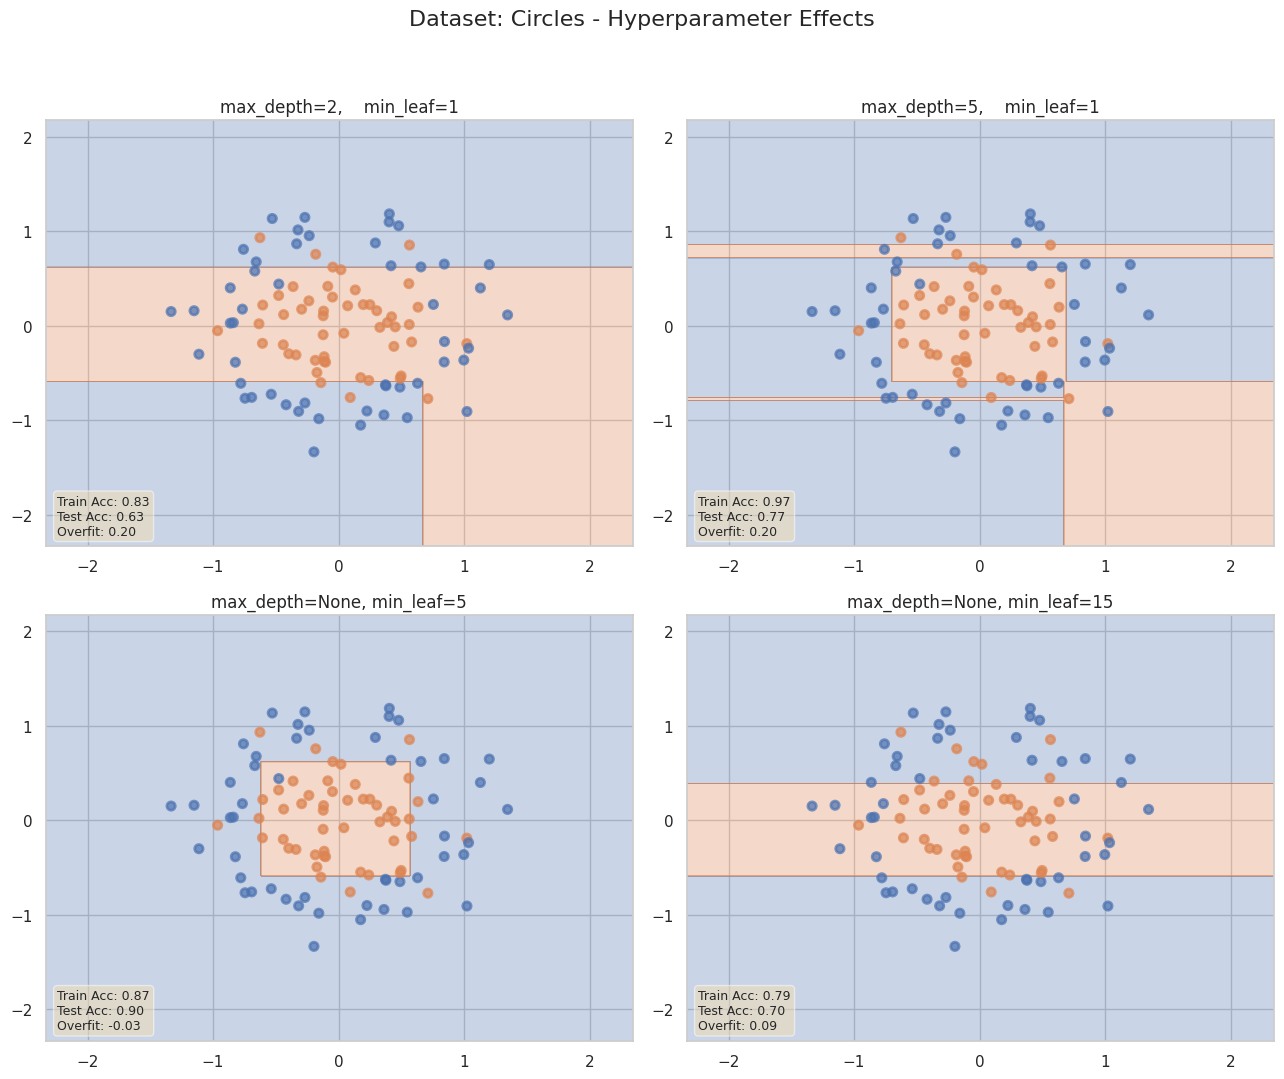

--------------------------------------------------

--- Dataset: Moons ---
Reference Default (max_depth=None, min_leaf=1):
Train Accuracy: 1.0000, Test Accuracy: 0.8667
Переобучение (Train - Test): 0.1333

Params: max_depth=2,    min_leaf=1
Train Accuracy: 0.9143, Test Accuracy: 0.9333
Переобучение (Train - Test): -0.0190
Переобучение УМЕНЬШИЛОСЬ по сравнению с default.

Params: max_depth=5,    min_leaf=1
Train Accuracy: 1.0000, Test Accuracy: 0.8667
Переобучение (Train - Test): 0.1333
Степень переобучения НЕ ИЗМЕНИЛАСЬ значительно по сравнению с default.

Params: max_depth=None, min_leaf=5
Train Accuracy: 0.9571, Test Accuracy: 0.7333
Переобучение (Train - Test): 0.2238
Переобучение УВЕЛИЧИЛОСЬ по сравнению с default (что маловероятно при регуляризации).

Params: max_depth=None, min_leaf=15
Train Accuracy: 0.8429, Test Accuracy: 0.8000
Переобучение (Train - Test): 0.0429
Переобучение УМЕНЬШИЛОСЬ по сравнению с default.



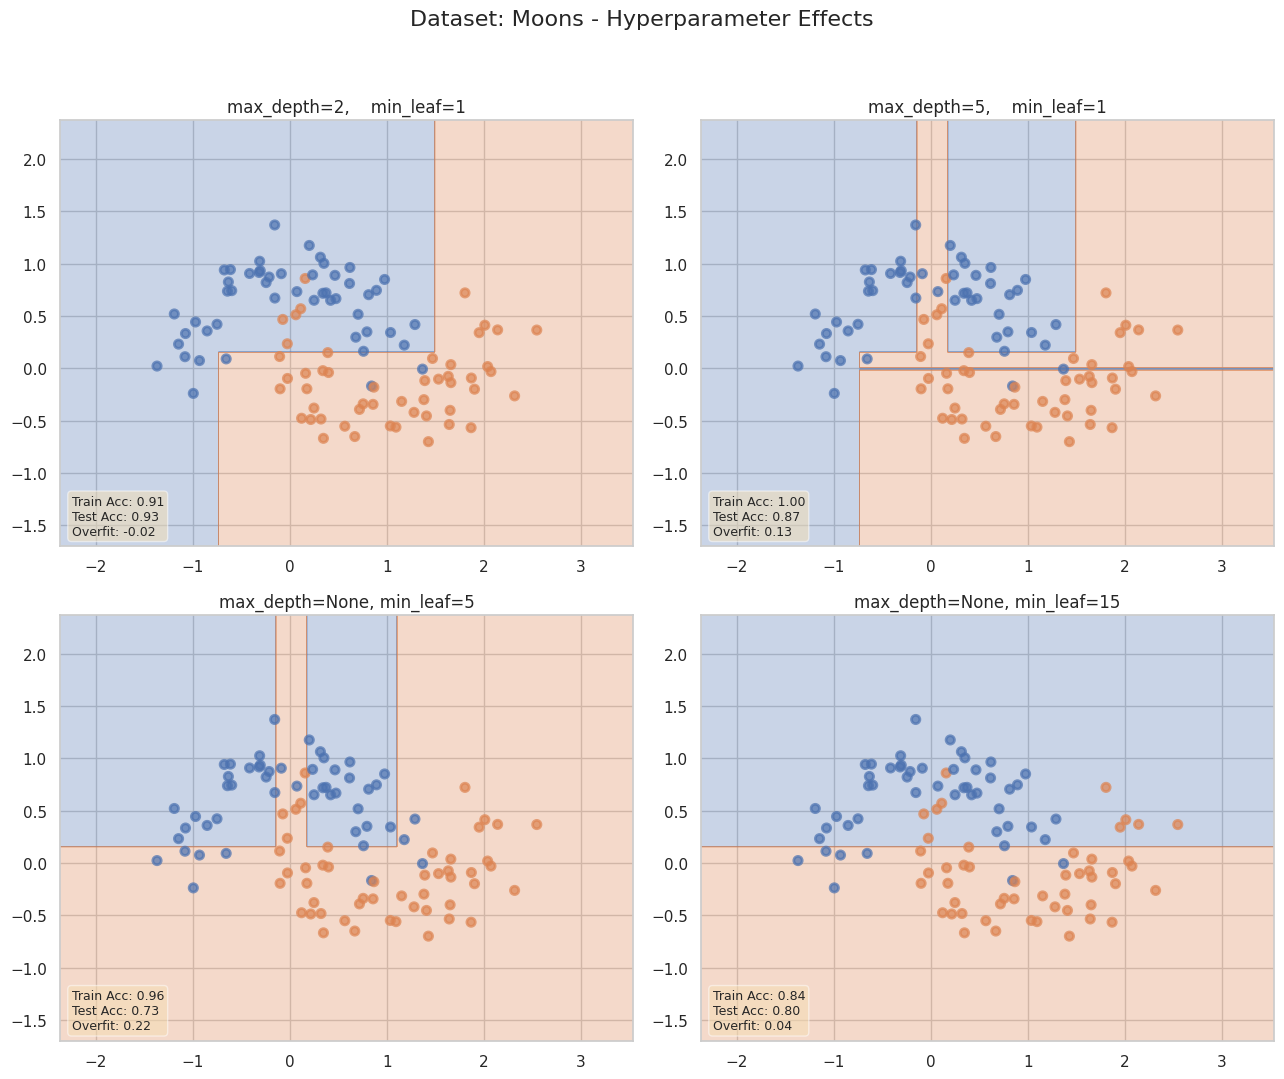

--------------------------------------------------

--- Dataset: Classification (3 classes) ---
Reference Default (max_depth=None, min_leaf=1):
Train Accuracy: 1.0000, Test Accuracy: 0.8333
Переобучение (Train - Test): 0.1667

Params: max_depth=2,    min_leaf=1
Train Accuracy: 0.9000, Test Accuracy: 0.7667
Переобучение (Train - Test): 0.1333
Переобучение УМЕНЬШИЛОСЬ по сравнению с default.

Params: max_depth=5,    min_leaf=1
Train Accuracy: 0.9714, Test Accuracy: 0.8000
Переобучение (Train - Test): 0.1714
Переобучение УВЕЛИЧИЛОСЬ по сравнению с default (что маловероятно при регуляризации).

Params: max_depth=None, min_leaf=5
Train Accuracy: 0.9000, Test Accuracy: 0.7000
Переобучение (Train - Test): 0.2000
Переобучение УВЕЛИЧИЛОСЬ по сравнению с default (что маловероятно при регуляризации).

Params: max_depth=None, min_leaf=15
Train Accuracy: 0.8857, Test Accuracy: 0.7667
Переобучение (Train - Test): 0.1190
Переобучение УМЕНЬШИЛОСЬ по сравнению с default.



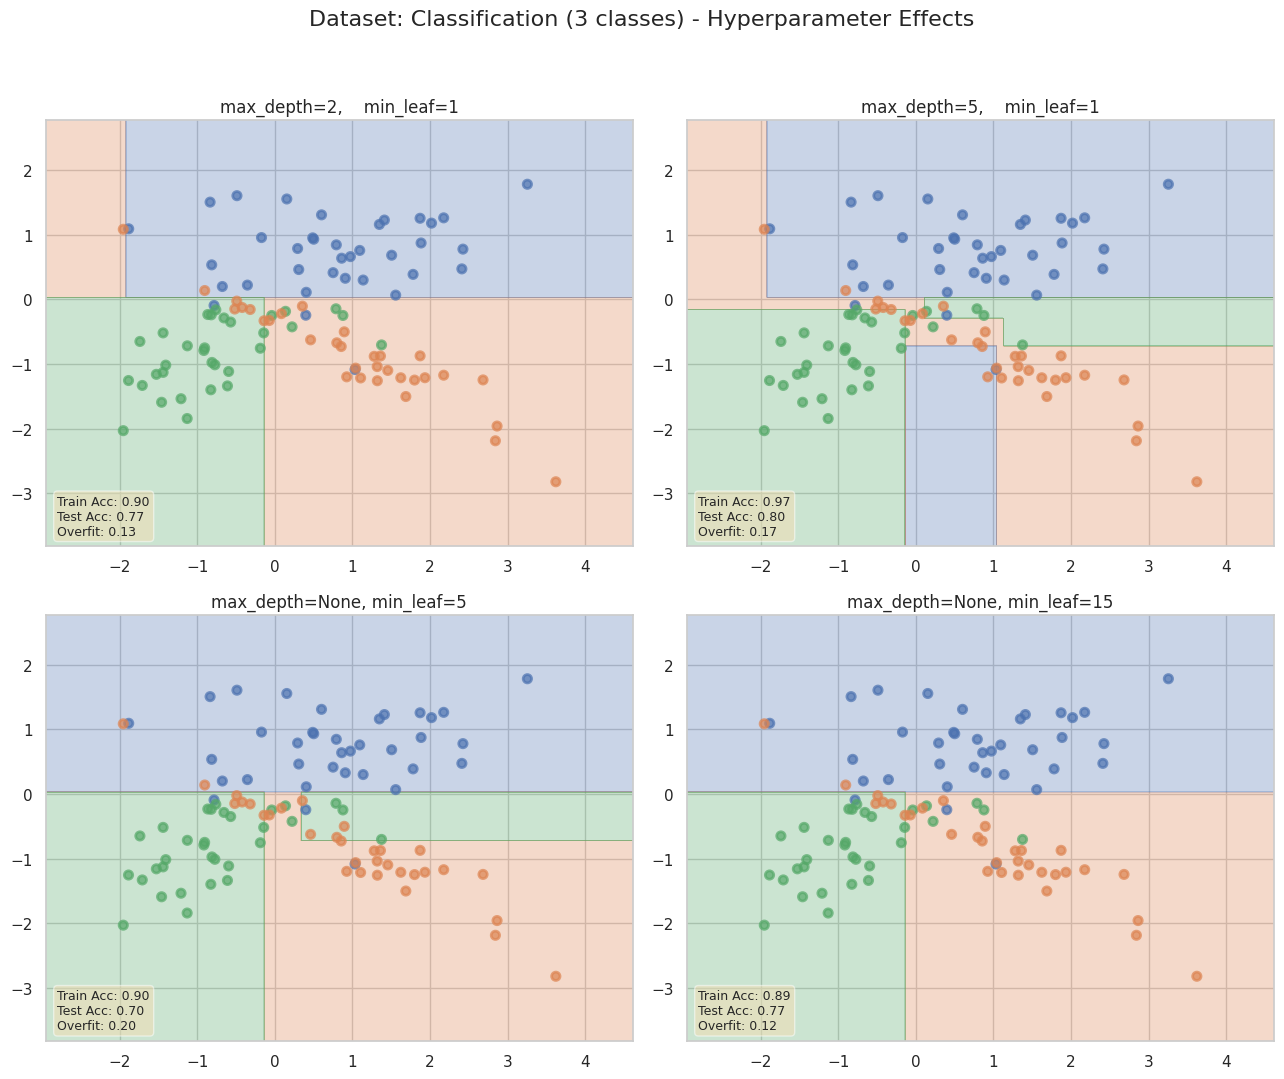

--------------------------------------------------



In [8]:
# Параметры для перебора
hyperparameter_sets = [
    {'max_depth': 2,    'min_samples_leaf': 1,  'label': 'max_depth=2,    min_leaf=1'},
    {'max_depth': 5,    'min_samples_leaf': 1,  'label': 'max_depth=5,    min_leaf=1'},
    {'max_depth': None, 'min_samples_leaf': 5,  'label': 'max_depth=None, min_leaf=5'},
    {'max_depth': None, 'min_samples_leaf': 15, 'label': 'max_depth=None, min_leaf=15'}
]

# Основной цикл для обработки датасетов
for i, (X, y) in enumerate(datasets_data):
    # 1. Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    print(f"--- Dataset: {dataset_names[i]} ---")

    # Сначала напомним результаты по умолчанию из предыдущего запуска
    clf_default_ref = DecisionTreeClassifier(random_state=42)
    clf_default_ref.fit(X_train, y_train)
    acc_train_default_ref = accuracy_score(y_train, clf_default_ref.predict(X_train))
    acc_test_default_ref = accuracy_score(y_test, clf_default_ref.predict(X_test))
    overfit_default_ref = acc_train_default_ref - acc_test_default_ref

    print(f"Reference Default (max_depth=None, min_leaf=1):")
    print(f"Train Accuracy: {acc_train_default_ref:.4f}, Test Accuracy: {acc_test_default_ref:.4f}")
    print(f"Переобучение (Train - Test): {overfit_default_ref:.4f}\n")

    # Создаем фигуру для 2x2 подграфиков
    fig, axes = plt.subplots(2, 2, figsize=(13, 11))
    axes = axes.flatten()

    for j, params in enumerate(hyperparameter_sets):
        ax = axes[j]

        # 2. Обучение модели DecisionTreeClassifier с заданными гиперпараметрами
        clf = DecisionTreeClassifier(
            max_depth=params['max_depth'],
            min_samples_leaf=params['min_samples_leaf'],
            random_state=42
        )
        clf.fit(X_train, y_train)

        # 3. Построение разделяющей поверхности
        # Передаем X, y (все данные) для визуализации всех точек.
        # Модель clf обучена на X_train, y_train.
        plot_surface(clf, X, y, ax=ax, title=params['label'])

        # 4. Расчет accuracy на обучающей и тестовой выборках
        y_pred_train = clf.predict(X_train)
        acc_train = accuracy_score(y_train, y_pred_train)

        y_pred_test = clf.predict(X_test)
        acc_test = accuracy_score(y_test, y_pred_test)
        current_overfit = acc_train - acc_test

        # Вывод результатов под графиком
        # Добавим информацию об accuracy прямо на график для наглядности
        stats_text = (f"Train Acc: {acc_train:.2f}\n"
                      f"Test Acc: {acc_test:.2f}\n"
                      f"Overfit: {current_overfit:.2f}")
        ax.text(0.02, 0.02, stats_text, transform=ax.transAxes, fontsize=9,
                verticalalignment='bottom', bbox=dict(boxstyle='round,pad=0.3', fc='wheat', alpha=0.5))

        # Также выведем в консоль для детального лога
        print(f"Params: {params['label']}")
        print(f"Train Accuracy: {acc_train:.4f}, Test Accuracy: {acc_test:.4f}")
        print(f"Переобучение (Train - Test): {current_overfit:.4f}")

        if abs(current_overfit - overfit_default_ref) < 1e-4 : # Если почти не изменилось
             print("Степень переобучения НЕ ИЗМЕНИЛАСЬ значительно по сравнению с default.")
        elif current_overfit < overfit_default_ref:
             print("Переобучение УМЕНЬШИЛОСЬ по сравнению с default.")
        else:
             print("Переобучение УВЕЛИЧИЛОСЬ по сравнению с default (что маловероятно при регуляризации).")
        print("")


    fig.suptitle(f"Dataset: {dataset_names[i]} - Hyperparameter Effects", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    print("-" * 50 + "\n")

__Ответ:__

### **1. Circles**
- **По умолчанию:** модель сильно переобучалась (разница Train–Test = 0.267), качество на тесте — 0.73.
- **Что помогло:** увеличение `min_samples_leaf` до 5. Это резко снизило переобучение и подняло точность на тесте до 0.90.
- **Что не помогло:** слишком маленькая глубина (`max_depth=2`) или слишком большое значение `min_leaf=15` — модель стала слишком простой и потеряла точность.
- **Вывод:** регуляризация здесь очень эффективна, особенно `min_samples_leaf=5`.

### **2. Moons**
- **По умолчанию:** также было небольшое переобучение (разница 0.13), точность на тесте — 0.87.
- **Что помогло:** ограничение глубины до 2 (`max_depth=2`). Точность выросла до 0.93, переобучения почти не стало.
- **Что не помогло:** увеличение `min_samples_leaf` до 5 и 15 — в этом случае модель стала хуже обобщать.
- **Вывод:** простая разделяющая поверхность (`max_depth=2`) идеально подошла для этого датасета.

### **3. Classification (3 класса)**
- **По умолчанию:** переобучение (разница 0.17), точность на тесте — 0.83.
- **Что получилось:** ни один из протестированных параметров не улучшил тестовую точность. Хотя переобучение частично снижалось, качество модели падало.
- **Вывод:** для этого датасета нужен более тонкий подбор параметров. Возможно, дефолтная модель уже достаточно хорошо "подогнана" под данные.

### **Общий вывод**
- **Регуляризация** (ограничение глубины и увеличение минимального числа образцов в листе) помогает бороться с переобучением, но не всегда повышает точность на новых данных.
- **Эффективные настройки зависят от структуры данных** — то, что работает на одном датасете, может не сработать на другом.
- **Оптимальное решение** требует экспериментов: иногда простая модель лучше, иногда она только ухудшает результат.


Если коротко:  
**Регуляризация полезна, но её надо подбирать осторожно и индивидуально под каждый набор данных.**

  

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

In [12]:
# Импорт внешних библиотек
import numpy as np

# Находит оптимальный порог разбиения вектора признака по критерию Джини
def find_best_split(
    feature_vector: np.ndarray,
    target_vector: np.ndarray
) -> tuple[np.ndarray, np.ndarray, float | None, float | None]:
    """
    Description:
    ---------------
        Находит оптимальный порог (threshold) для разбиения заданного вектора
        признака по критерию Джини относительно бинарного целевого вектора.
        Подходит для задач бинарной классификации (например, построение дерева решений).
        Реализация полностью векторизована с целью ускорения перебора порогов.

    Args:
    ---------------
        feature_vector: numpy.ndarray
            Вектор значений признака (размер n), должен быть одномерным.
        target_vector: numpy.ndarray
            Бинарный вектор меток (размер n), содержит только значения 0 и 1.

    Returns:
    ---------------
        possible_thresholds: numpy.ndarray
            Массив всех возможных пороговых значений, которые допускают разбиение
            на два поддерева с ненулевым количеством объектов.
        ginis_for_thresholds: numpy.ndarray
            Массив значений критерия Джини для каждого возможного порога.
        threshold_best: float | None
            Лучший найденный порог (при равных — минимальный), либо None,
            если разбиение невозможно.
        gini_best: float | None
            Значение критерия Джини для лучшего порога, либо None, если разбиение невозможно.

    Raises:
    ---------------
        ValueError:
            Если входные вектора имеют разную длину или не одномерные.
        TypeError:
            Если переданные аргументы не являются numpy.ndarray.
        Примечание: В текущей реализации данные проверки не реализованы,
            но их следует добавить для надёжности в боевом коде.

    Examples:
    ---------------
        >>> import numpy as np
        >>> X = np.array([1.0, 2.0, 3.0, 4.0])
        >>> y = np.array([0, 1, 1, 0])
        >>> find_best_split(X, y)
        (array([1.5, 2.5, 3.5]), array([-0.375, -0.375, -0.375]), 1.5, -0.375)
    """
    n: int = len(feature_vector)

    # Если данных мало (меньше двух объектов), разбиение невозможно.
    if n <= 1:
        return np.array([]), np.array([]), None, None

    # Сортировка признака и соответствующего ему целевого вектора.
    # Это необходимо для эффективного перебора возможных порогов.
    sorted_indices: np.ndarray = np.argsort(feature_vector)
    sorted_features: np.ndarray = feature_vector[sorted_indices]
    sorted_targets: np.ndarray = target_vector[sorted_indices]

    # Поиск индексов, в которых меняется значение признака
    # (то есть между какими объектами можно провести потенциальный порог).
    unique_split_indices: np.ndarray = np.where(np.diff(sorted_features) != 0)[0]

    if len(unique_split_indices) == 0:
        # Признак константный — разбиение невозможно.
        return np.array([]), np.array([]), None, None

    # Возможные пороги: среднее между соседними уникальными значениями признака.
    possible_thresholds: np.ndarray = (
        sorted_features[unique_split_indices] +
        sorted_features[unique_split_indices + 1]
    ) / 2.0

    if possible_thresholds.size == 0:
        return np.array([]), np.array([]), None, None

    # Векторизированный расчет количества элементов в левых и правых поддеревьях.
    n_left_elements: np.ndarray = unique_split_indices + 1
    n_right_elements: np.ndarray = n - n_left_elements

    # Кумулятивная сумма для подсчёта количества объектов каждого класса.
    sorted_targets_cumsum: np.ndarray = np.cumsum(sorted_targets)
    class1_left: np.ndarray = sorted_targets_cumsum[unique_split_indices]
    class0_left: np.ndarray = n_left_elements - class1_left

    total_class1_in_node: int = sorted_targets_cumsum[-1]
    class1_right: np.ndarray = total_class1_in_node - class1_left
    class0_right: np.ndarray = n_right_elements - class1_right

    # Вычисление индекса Джини для левых поддеревьев.
    # Формула: H(R) = 1 - p_1^2 - p_0^2
    p1_l: np.ndarray = class1_left / n_left_elements
    p0_l: np.ndarray = class0_left / n_left_elements
    h_left: np.ndarray = 1 - (p1_l ** 2 + p0_l ** 2)

    # Вычисление индекса Джини для правых поддеревьев.
    p1_r: np.ndarray = class1_right / n_right_elements
    p0_r: np.ndarray = class0_right / n_right_elements
    h_right: np.ndarray = 1 - (p1_r ** 2 + p0_r ** 2)

    # Итоговое значение критерия разбиения Q(R) для каждого порога.
    # Q(R) = - (|R_l|/|R|) * H(R_l) - (|R_r|/|R|) * H(R_r)
    ginis_for_thresholds: np.ndarray = (
        - (n_left_elements / n) * h_left -
        (n_right_elements / n) * h_right
    )

    if ginis_for_thresholds.size == 0:
        return np.array([]), np.array([]), None, None

    max_gini_value: float = float(np.max(ginis_for_thresholds))

    # Если max_gini_value невалиден (NaN) — возможны некорректные входные данные.
    if np.isnan(max_gini_value):
        # Возвращаем массивы порогов и значения Джини, но не указываем "лучший" выбор.
        return possible_thresholds, ginis_for_thresholds, None, None

    # Поиск индексов всех порогов с максимальным значением Джини.
    best_indices: np.ndarray = np.where(ginis_for_thresholds == max_gini_value)[0]

    # При равенстве критерия выбираем минимальный порог (по требованию).
    threshold_best: float = float(np.min(possible_thresholds[best_indices]))
    gini_best: float = max_gini_value  # Наилучшее (максимальное) значение Q(R).

    return possible_thresholds, ginis_for_thresholds, threshold_best, gini_best

__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

In [13]:
# Импорт внешних библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from typing import List

# --- Константы для управления визуализацией и стабильности графиков ---
FIGSIZE_GINI: tuple = (14, 8)              # Размер графика Джини
FIGSIZE_SCATTER_UNIT: tuple = (6, 4.5)     # Размер одного scatter-графика
JITTER_STD: float = 0.035                  # Стандартное отклонение для jitter по y
SCATTER_POINT_SIZE: int = 20               # Размер точек scatter-графика
SCATTER_ALPHA: float = 0.6                 # Прозрачность точек
SCATTER_COLORS: tuple = ('blue', 'green')  # Цвета классов 0 и 1

# Краткое описание: Загружает данные и возвращает признаки и целевую переменную
def load_student_data(
    csv_path: str
) -> tuple[np.ndarray, np.ndarray, List[str], str]:
    """
    Description:
    ---------------
        Загружает данные из CSV-файла и выделяет матрицу признаков и целевой вектор.

    Args:
    ---------------
        csv_path: str
            Путь к файлу с данными.

    Returns:
    ---------------
        X: np.ndarray
            Матрица признаков (размер n x m).
        y: np.ndarray
            Вектор целевой переменной (размер n).
        feature_names: List[str]
            Список имён признаков.
        target_name: str
            Имя целевой переменной.

    Raises:
    ---------------
        FileNotFoundError: Если файл не найден.
        ValueError: Если в данных недостаточно столбцов.

    Examples:
    ---------------
        >>> X, y, features, target = load_student_data('students.csv')
    """
    df: pd.DataFrame = pd.read_csv(csv_path)
    if df.shape[1] < 2:
        raise ValueError("Должно быть не менее двух столбцов (признаки и целевая переменная).")
    feature_names: List[str] = df.columns[:-1].tolist()
    target_name: str = df.columns[-1]
    X: np.ndarray = df[feature_names].values
    y: np.ndarray = df[target_name].values
    return X, y, feature_names, target_name

# Краткое описание: Строит графики "Порог — Джини" для всех признаков
def plot_gini_curves(
    X: np.ndarray,
    y: np.ndarray,
    feature_names: List[str]
) -> None:
    """
    Description:
    ---------------
        Строит кривые зависимости критерия Джини Q(R) от порога для каждого признака.
        Для каждого признака находится набор возможных порогов и соответствующих
        значений критерия Джини с помощью функции find_best_split.

    Args:
    ---------------
        X: np.ndarray
            Матрица признаков (n x m).
        y: np.ndarray
            Вектор целевой переменной (n).
        feature_names: List[str]
            Список имён признаков.

    Returns:
    ---------------
        None

    Raises:
    ---------------
        Exception: В случае ошибок в исходных данных.

    Examples:
    ---------------
        >>> plot_gini_curves(X, y, feature_names)
    """
    plt.figure(figsize=FIGSIZE_GINI)
    plt.title('Зависимость критерия Джини Q(R) от порога для каждого признака', fontsize=15)
    plt.xlabel('Порог', fontsize=12)
    plt.ylabel('Значение критерия Джини Q(R)', fontsize=12)

    best_points_info = []

    for i, feature_name in enumerate(feature_names):
        feature_vector = X[:, i]

        # Вызываем пользовательскую функцию поиска лучшего порога
        thresholds, ginis, threshold_best, gini_best = find_best_split(feature_vector, y)

        if thresholds.size > 0 and ginis.size > 0:
            # Сортируем пороги и значения Джини для корректного отображения линии
            sort_indices = np.argsort(thresholds)
            sorted_thresholds_plot = thresholds[sort_indices]
            sorted_ginis_plot = ginis[sort_indices]

            plt.plot(
                sorted_thresholds_plot,
                sorted_ginis_plot,
                label=f'{feature_name}',
                marker='.', linestyle='-', markersize=5
            )

            if threshold_best is not None and gini_best is not None:
                plt.scatter(
                    [threshold_best], [gini_best],
                    marker='x', color='red', s=120, zorder=5
                )
                best_points_info.append({
                    'name': feature_name, 'x': threshold_best, 'y': gini_best
                })
        else:
            print(
                f"Для признака '{feature_name}' не найдено подходящих порогов для построения графика Джини."
            )

    plt.legend(title="Признаки", fontsize=10, title_fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.tight_layout()
    plt.show()

# Краткое описание: Строит scatter-графики "Значение признака — Класс"
def plot_scatter_features_vs_class(
    X: np.ndarray,
    y: np.ndarray,
    feature_names: List[str]
) -> None:
    """
    Description:
    ---------------
        Строит scatter-графики "Значение признака — Класс" для каждого признака.
        Для наглядности метки классов (0/1) отображаются с небольшим случайным
        смещением (jitter) по оси Y, чтобы визуально избежать наложения точек.

    Args:
    ---------------
        X: np.ndarray
            Матрица признаков (n x m).
        y: np.ndarray
            Вектор целевой переменной (n).
        feature_names: List[str]
            Список имён признаков.

    Returns:
    ---------------
        None

    Raises:
    ---------------
        Exception: В случае ошибок в исходных данных.

    Examples:
    ---------------
        >>> plot_scatter_features_vs_class(X, y, feature_names)
    """
    num_features: int = len(feature_names)
    n_cols: int = 2
    n_rows: int = (num_features + n_cols - 1) // n_cols

    plt.figure(figsize=(n_cols * FIGSIZE_SCATTER_UNIT[0], n_rows * FIGSIZE_SCATTER_UNIT[1]))
    plt.suptitle(
        'Распределение классов в зависимости от значения признака',
        fontsize=16, y=1.02
    )

    for i, feature_name in enumerate(feature_names):
        ax = plt.subplot(n_rows, n_cols, i + 1)
        feature_vector = X[:, i]

        # Добавляем jitter по оси Y для читаемости точек одного класса
        y_jittered = y + np.random.normal(0, JITTER_STD, size=y.shape)

        # Определяем цвет точки по классу
        colors = [SCATTER_COLORS[val] for val in y]

        plt.scatter(
            feature_vector, y_jittered,
            alpha=SCATTER_ALPHA,
            s=SCATTER_POINT_SIZE,
            c=colors
        )

        plt.yticks([0, 1])
        ax.set_yticklabels(['Класс 0', 'Класс 1'])
        plt.xlabel(f'Значение признака \"{feature_name}\"', fontsize=11)
        plt.ylabel('Класс', fontsize=11)
        plt.title(f'Признак: {feature_name}', fontsize=13)
        plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout(rect=[0, 0, 1, 0.98])  # rect чтобы suptitle не накладывался
    plt.show()

def main() -> None:
    """
    Description:
    ---------------
        Главная функция модуля: загружает данные, строит графики "Порог — Джини"
        и scatter-графики "Значение признака — Класс" для наглядного анализа.

    Args:
    ---------------
        None

    Returns:
    ---------------
        None

    Examples:
    ---------------
        >>> main()
    """
    # Путь к файлу с данными
    csv_path = 'students.csv'
    # Загрузка данных
    X, y, feature_names, target_name = load_student_data(csv_path)
    # Строим кривые "Порог — Джини"
    plot_gini_curves(X, y, feature_names)
    # Строим scatter-графики
    plot_scatter_features_vs_class(X, y, feature_names)

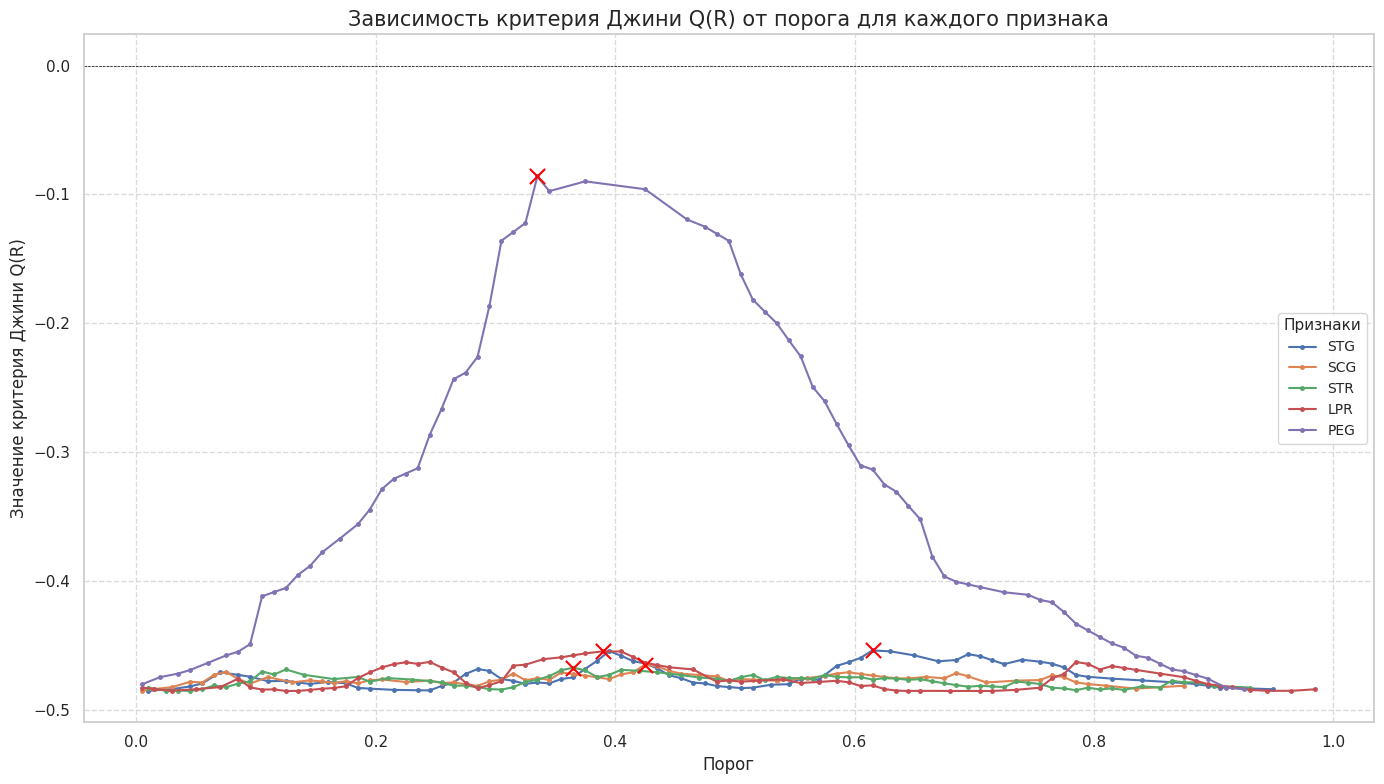

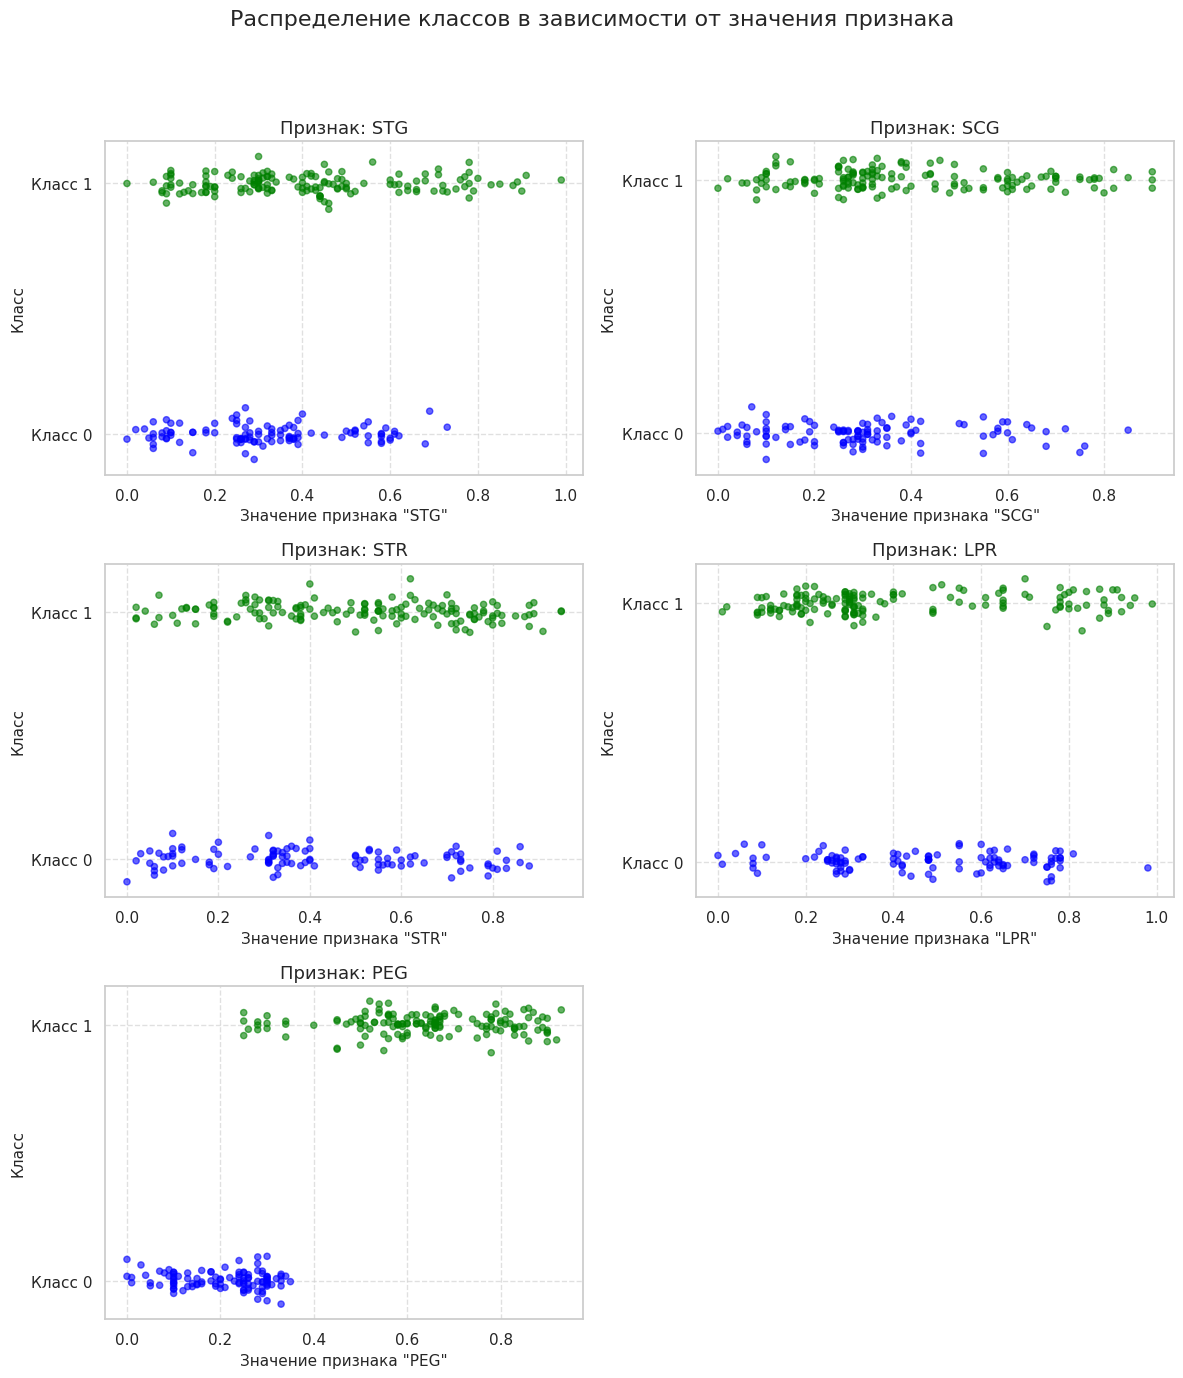

In [14]:
main()

__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

**Ответ:** Давайте разберём по порядку.

**1. По какому признаку делить выборку?**  
Нам нужно выбрать такой признак и порог, чтобы критерий Джини `Q(R)` был **максимально возможным** (то есть ближе к нулю).  

- У **PEG** (фиолетовая линия) пик `Q(R)` около **–0.09**, это намного лучше, чем у других (~–0.45––0.48).  
- Оптимальный порог для PEG — примерно **0.33–0.35**.

**Вывод:** делим по признаку **PEG** на пороге ~**0.34**.

**2. Совпадает ли с визуальной оценкой графиков?**  
Если бы мы посмотрели на scatter-графики, то должны были бы увидеть:  
- Для **PEG** — хорошее разделение классов вокруг этого порога.  
- Для остальных — сильное пересечение классов, чёткой границы нет.  

То есть вывод по Джини должен **совпасть с графиками**.

**3. Как выглядит кривая "хорошего" признака?**  
- Пик `Q(R)` **близок к 0**.  
- Есть **чёткий оптимальный порог**.  
- При отклонении от него качество резко падает.

**4. Чем отличаются "хорошие" и "плохие" признаки?**

| Характеристика | Хороший признак (например, PEG) | Плохой признак (STG, SCG и др.) |
|----------------|-------------------------------|----------------------------------|
| Пик Q(R)       | Близок к 0                     | Сильно отрицательный (~–0.4 и ниже) |
| Форма кривой   | Ясный максимум                 | Пологая или без явного пика      |
| Зависимость от порога | Резкое падение от пика     | Малочувствительность к порогу    |

**Итого:** **PEG** — лучший признак для разделения, остальные почти не помогают.

__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




**Ошибки в методе `_fit_node`:**

1. **Игнорирование гиперпараметров**

   * Параметры `max_depth`, `min_samples_split` и `min_samples_leaf` объявлены в конструкторе, но нигде не проверяются — дерево всегда растёт без ограничений.
2. **Отсутствует проверка на `min_samples_split`**

   * Метод пытается разбить даже очень маленькие подвыборки, хотя должно быть `len(sub_y) >= min_samples_split`.
3. **Не обеспечивается `min_samples_leaf`**

   * После разбиения нет гарантии, что в каждом из детей останется как минимум `min_samples_leaf` объектов.
4. **Нет контроля глубины (`max_depth`)**

   * В рекурсивных вызовах не передаётся текущая глубина, поэтому условие остановки по `max_depth` не реализовано.

---

**Финальная версия метода `_predict_node`:**

```python
def _predict_node(self, x, node):
    """
    Рекурсивное предсказание класса для одного объекта.
    """
    # 1. Если узел терминальный — сразу возвращаем класс
    if node["type"] == "terminal":
        return node["class"]

    # 2. Иначе смотрим, по какому признаку он разбивается
    feature = node["feature_split"]
    feat_type = self._feature_types[feature]

    # 3. Обработка вещественного признака
    if feat_type == "real":
        if x[feature] < node["threshold"]:
            return self._predict_node(x, node["left_child"])
        else:
            return self._predict_node(x, node["right_child"])

    # 4. Обработка категориального признака
    elif feat_type == "categorical":
        cats_left = node.get("categories_split", [])
        if x[feature] in cats_left:
            return self._predict_node(x, node["left_child"])
        else:
            return self._predict_node(x, node["right_child"])

    # 5. На всякий случай — защита от некорректного типа
    else:
        raise ValueError(f"Неизвестный тип признака: {feat_type}")
```

Этот код надёжно спускается по дереву, обрабатывая и вещественные, и категориальные признаки, и возвращает предсказанный класс.


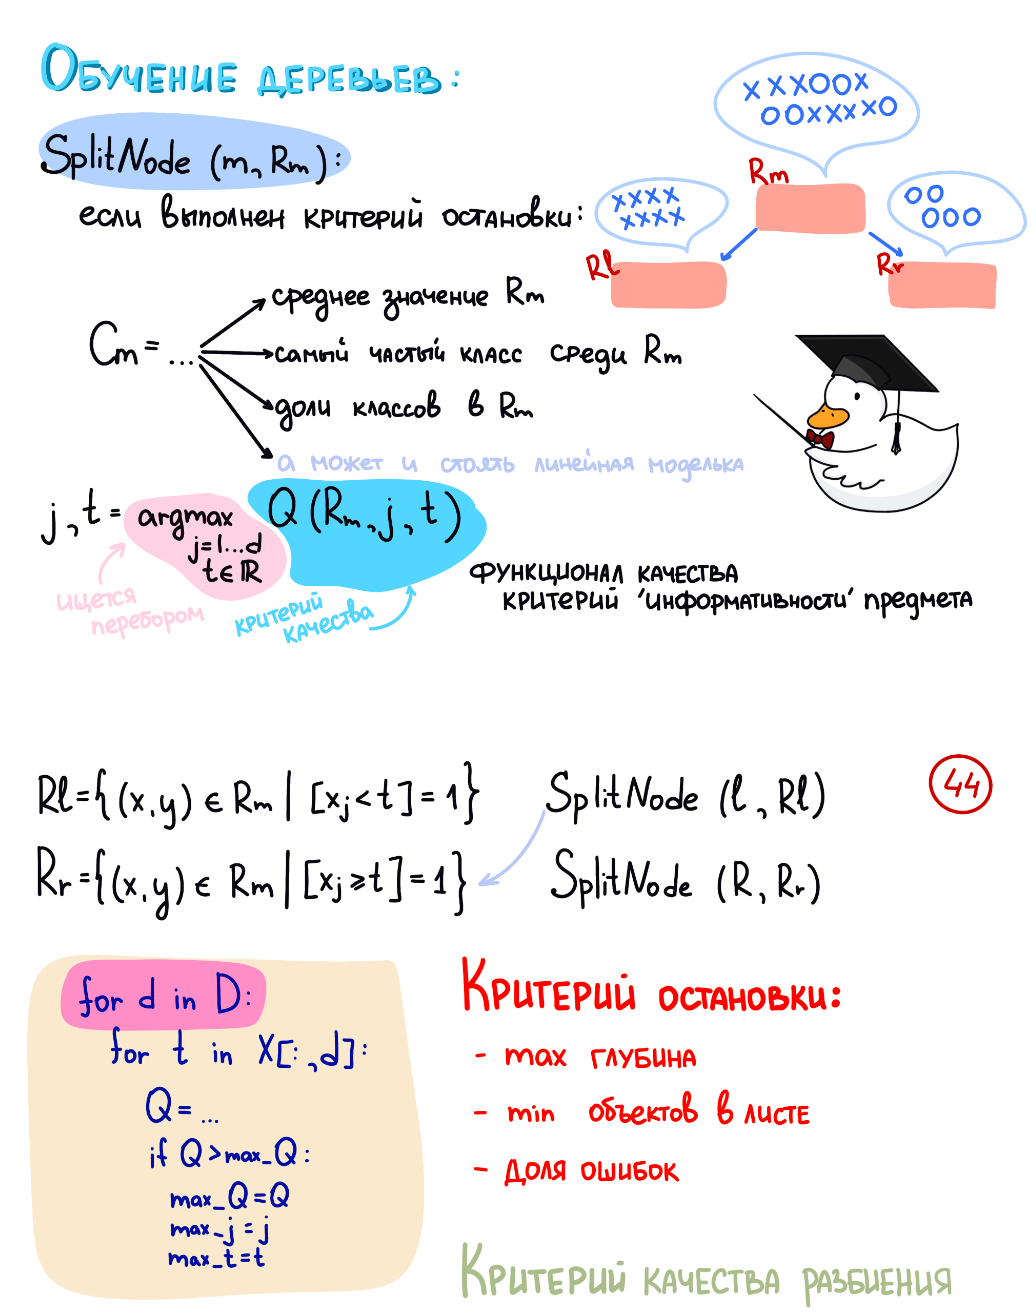

__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть` agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

In [18]:
# Standard Library
import os
from collections import Counter
from typing import Optional, Tuple, List, Dict, Any

# Third-party Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Поиск оптимального порога разделения по критерию Джини
def find_best_split(
    feature_vector: np.ndarray,
    target_vector: np.ndarray
) -> Tuple[np.ndarray, np.ndarray, Optional[float], Optional[float]]:
    """
    Description:
    ---------------
        Вычисляет пороги и значения критерия Джини для вектора признака.

    Args:
    ---------------
        feature_vector: Вектор значений признака.
        target_vector: Вектор целевых меток (0 или 1).

    Returns:
    ---------------
        thresholds: Массив возможных порогов разделения.
        ginis: Массив соответствующих значений Gini.
        best_threshold: Лучший порог (если найден), иначе None.
        best_gini: Наилучшее значение Gini или None.

    Raises:
    ---------------
        ValueError: Если feature_vector пустой.

    Examples:
    ---------------
        >>> fv = np.array([1, 2, 3, 4])
        >>> tv = np.array([0, 1, 0, 1])
        >>> find_best_split(fv, tv)
        (array([1.5, 2.5, 3.5]), array([...]), 2.5, ...)
    """
    if feature_vector.size == 0:
        raise ValueError("feature_vector не должен быть пустым")

    values = np.unique(feature_vector)
    if values.size <= 1:
        return np.array([]), np.array([]), None, None

    thresholds: List[float] = []
    ginis: List[float] = []
    best_threshold: Optional[float] = None
    best_gini: Optional[float] = None
    n = feature_vector.size

    for i in range(values.size - 1):
        thr = (values[i] + values[i + 1]) / 2.0
        left_mask = feature_vector < thr
        right_mask = ~left_mask
        if not left_mask.any() or not right_mask.any():
            continue

        left_y = target_vector[left_mask]
        p1_l = np.mean(left_y == 1)
        p0_l = np.mean(left_y == 0)
        h_l = 1 - p1_l**2 - p0_l**2

        right_y = target_vector[right_mask]
        p1_r = np.mean(right_y == 1)
        p0_r = np.mean(right_y == 0)
        h_r = 1 - p1_r**2 - p0_r**2

        gini_score = - (left_mask.sum() / n) * h_l \
                     - (right_mask.sum() / n) * h_r

        thresholds.append(thr)
        ginis.append(gini_score)
        if best_gini is None or gini_score > best_gini:
            best_gini = gini_score
            best_threshold = thr

    return (
        np.array(thresholds),
        np.array(ginis),
        best_threshold,
        best_gini
    )

# Реализация решающего дерева для классификации
class DecisionTree:
    """
    Description:
    ---------------
        Класс для обучения и предсказания с помощью
        решающего дерева.

    Args:
    ---------------
        feature_types: Список типов признаков.

    Attributes:
    ---------------
        _tree: Вложенный словарь, описывающий дерево.
        _feature_types: Типы признаков.
    """

    def __init__(self, feature_types: List[str]) -> None:
        self._tree: Dict[str, Any] = {}
        self._feature_types: List[str] = feature_types

    def _fit_node(
        self,
        X: np.ndarray,
        y: np.ndarray,
        node: Dict[str, Any]
    ) -> None:
        """
        Description:
        ---------------
            Рекурсивная функция для построения узла дерева.

        Args:
        ---------------
            X: Двумерный массив признаков для текущего узла.
            y: Массив меток для текущего узла.
            node: Словарь для хранения структуры узла.
        """
        if np.all(y == y[0]):
            node["type"] = "terminal"
            node["class"] = y[0]
            return

        feature_best: Optional[int] = None
        threshold_best: Any = None
        gini_best: Optional[float] = None
        split_mask: Any = None

        for f in range(X.shape[1]):
            counts = Counter(X[:, f])
            clicks = Counter(X[y == 1, f])
            ratio = {
                cat: clicks.get(cat, 0) / cnt
                for cat, cnt in counts.items()
            }
            sorted_cats = sorted(ratio, key=ratio.get)
            cat_map = {
                cat: i
                for i, cat in enumerate(sorted_cats)
            }
            fv = np.vectorize(cat_map.get)(X[:, f])

            if np.unique(fv).size <= 1:
                continue

            _, _, thr, gini = find_best_split(fv, y)
            if thr is None:
                continue

            if gini_best is None or gini > gini_best:
                feature_best = f
                gini_best = gini
                split_mask = fv < thr
                threshold_best = [
                    cat for cat, idx in cat_map.items() if idx < thr
                ]

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"
        node["feature_split"] = feature_best
        node["categories_split"] = threshold_best
        node["left_child"] = {}
        node["right_child"] = {}

        self._fit_node(
            X[split_mask],
            y[split_mask],
            node["left_child"]
        )
        self._fit_node(
            X[~split_mask],
            y[~split_mask],
            node["right_child"]
        )

    def _predict_node(
        self,
        x: np.ndarray,
        node: Dict[str, Any]
    ) -> Any:
        """
        Description:
        ---------------
            Рекурсивно проходит по узлам дерева для
            получения предсказания для одного объекта.

        Args:
        ---------------
            x: Вектор признаков объекта.
            node: Словарь узла текущей ветви.

        Returns:
        ---------------
            Метка класса.
        """
        if node["type"] == "terminal":
            return node["class"]

        feat = node["feature_split"]
        cats_left = node["categories_split"]
        if x[feat] in cats_left:
            return self._predict_node(x, node["left_child"])
        return self._predict_node(x, node["right_child"])

    # Обучение модели
    def fit(
        self,
        X: np.ndarray,
        y: np.ndarray
    ) -> None:
        """
        Description:
        ---------------
            Обучает дерево решений на выборке.

        Args:
        ---------------
            X: Двумерный массив признаков.
            y: Массив меток.
        """
        self._fit_node(X, y, self._tree)

    # Предсказание
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Description:
        ---------------
            Предсказывает метки для массива объектов.

        Args:
        ---------------
            X: Двумерный массив признаков.

        Returns:
        ---------------
            Массив предсказанных меток.
        """
        return np.array([
            self._predict_node(x, self._tree)
            for x in X
        ])

# Точка входа скрипта
def main() -> None:
    """
    Description:
    ---------------
        Загрузка данных, обучение дерева и оценка точности.

    Raises:
    ---------------
        FileNotFoundError: Если файл данных не найден.
    """
    path = 'agaricus-lepiota.data'
    if not os.path.exists(path):
        raise FileNotFoundError(f"Файл не найден: {path}")

    df = pd.read_csv(path, header=None)
    encoder = LabelEncoder()
    for column in df.columns:
        df[column] = encoder.fit_transform(df[column])

    y = df.iloc[:, 0].values
    X = df.iloc[:, 1:].values

    np.random.seed(0)
    idx = np.random.permutation(len(df))
    half = len(df) // 2
    train_idx = idx[:half]
    test_idx = idx[half:]

    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]

    tree = DecisionTree(
        feature_types=['categorical'] * X.shape[1]
    )
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)

    accuracy = np.mean(y_pred == y_test)
    print(f"Accuracy: {accuracy:.4f}")

In [19]:
main()

Accuracy: 1.0000


__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

In [14]:
# Standard library
import warnings

# Third-party libraries
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# --- Игнорирование предупреждений от sklearn ---
warnings.filterwarnings(
    "ignore",
    category=UserWarning,
    module="sklearn.preprocessing._encoders"
)
warnings.filterwarnings(
    "ignore",
    category=FutureWarning,
    module="sklearn"
)

# --- Загрузка датасетов ---
# Mushrooms
try:
    mushrooms_df = pd.read_csv(
        "agaricus-lepiota.data",
        header=None
    )
except FileNotFoundError:
    try:
        url_mushrooms = (
            "https://archive.ics.uci.edu/ml/"
            "machine-learning-databases/mushroom/"
            "agaricus-lepiota.data"
        )
        mushrooms_df = pd.read_csv(
            url_mushrooms,
            header=None
        )
    except Exception as e:
        print(
            f"Не удалось загрузить 'mushrooms': {e}. "
            "Проверьте наличие файла или доступ в интернет."
        )
        exit()

# Tic-Tac-Toe
try:
    with open("tic-tac-toe-endgame.csv", "r") as f:
        first_line = f.readline().strip()

    if (
        first_line.lower().startswith("v1,v2,")
        or first_line.lower().startswith('"v1","v2",')
    ):
        tic_tac_toe_df = pd.read_csv(
            "tic-tac-toe-endgame.csv",
            header=0
        )
        ttt_X_cols = tic_tac_toe_df.columns[:-1].tolist()
        ttt_y_col = tic_tac_toe_df.columns[-1]
    else:
        tic_tac_toe_df = pd.read_csv(
            "tic-tac-toe-endgame.csv",
            header=None
        )
        tic_tac_toe_df.columns = [
            i for i in range(tic_tac_toe_df.shape[1])
        ]
        ttt_X_cols = list(
            range(tic_tac_toe_df.shape[1] - 1)
        )
        ttt_y_col = (
            tic_tac_toe_df.shape[1] - 1
        )
except FileNotFoundError:
    print(
        "Файл 'tic-tac-toe-endgame.csv' не найден. "
        "Убедитесь, что он находится в рабочей директории."
    )
    exit()
except Exception as e:
    print(
        f"Ошибка при чтении 'tic-tac-toe-endgame.csv': {e}"
    )
    exit()

# Cars
try:
    url_cars = (
        "https://archive.ics.uci.edu/ml/"
        "machine-learning-databases/car/car.data"
    )
    cars_df = pd.read_csv(
        url_cars,
        header=None
    )
except Exception as e:
    print(
        f"Не удалось загрузить 'cars' с UCI: {e}"
    )
    exit()

# Nursery
try:
    url_nursery = (
        "https://archive.ics.uci.edu/ml/"
        "machine-learning-databases/nursery/nursery.data"
    )
    nursery_df = pd.read_csv(
        url_nursery,
        header=None
    )
except Exception as e:
    print(
        f"Не удалось загрузить 'nursery' с UCI: {e}"
    )
    exit()

# Карта датасетов и их конфигурации
datasets_map = {
    "mushrooms": mushrooms_df.copy(),
    "tic-tac-toe": tic_tac_toe_df.copy(),
    "cars": cars_df.copy(),
    "nursery": nursery_df.copy()
}

dataset_configs = {
    "mushrooms": {
        "X_cols": list(range(1, 23)),
        "y_col": 0,
        "y_map": {"p": 1, "e": 0}
    },
    "tic-tac-toe": {
        "X_cols": ttt_X_cols,
        "y_col": ttt_y_col,
        "y_map": {"positive": 1, "negative": 0}
    },
    "cars": {
        "X_cols": list(range(0, 6)),
        "y_col": 6,
        "y_map": {
            "unacc": 0,
            "acc": 0,
            "good": 1,
            "vgood": 1
        }
    },
    "nursery": {
        "X_cols": list(range(0, 8)),
        "y_col": 8,
        "y_map": {
            "not_recom": 0,
            "recommend": 0,
            "very_recom": 1,
            "priority": 1,
            "spec_prior": 1
        }
    }
}

results_list = []  # Список результатов для итогового DataFrame

# Обработка каждого датасета
for name, df_original in datasets_map.items():
    df = df_original.copy()
    config = dataset_configs[name]

    # Отделение признаков и целевой переменной
    X_raw = (
        df.loc[:, config["X_cols"]]
        if all(isinstance(col, str) for col in config["X_cols"])
        else df.iloc[:, config["X_cols"]]
    )
    y_raw = (
        df.loc[:, config["y_col"]]
        if isinstance(config["y_col"], str)
        else df.iloc[:, config["y_col"]]
    )

    # Преобразование y согласно карте
    y = y_raw.map(config["y_map"])
    if y.isnull().any():
        unmapped = y_raw[y.isnull()].unique()
        print(
            f"КРИТИЧЕСКАЯ ОШИБКА: NaN в y для {name}. "
            f"Несмапленные значения: {unmapped}."
        )
        results_list.append({
            "Dataset": name,
            "DT_real_LE": np.nan,
            "DT_cat_LE": np.nan,
            "DT_real_OHE": np.nan,
            "Sklearn_DT_LE": np.nan
        })
        continue
    y = y.astype(int)

    # Label Encoding для X
    X_le = X_raw.copy()
    for col in X_le.columns:
        le = LabelEncoder()
        X_le[col] = le.fit_transform(
            X_le[col].astype(str)
        )

    # Инициализация классификатора и scorer
    dt_classifier = DecisionTreeClassifier(
        random_state=42
    )
    scorer = make_scorer(
        accuracy_score
    )

    current_accuracies = {"Dataset": name}

    # 1. DecisionTree на числовых данных (после LE)
    try:
        scores = cross_val_score(
            dt_classifier,
            X_le,
            y,
            cv=10,
            scoring=scorer
        )
        current_accuracies["DT_real_LE"] = scores.mean()
    except Exception:
        current_accuracies["DT_real_LE"] = np.nan

    # 2. DecisionTree на категориальных данных (LabelEncoded)
    try:
        scores = cross_val_score(
            dt_classifier,
            X_le,
            y,
            cv=10,
            scoring=scorer
        )
        current_accuracies["DT_cat_LE"] = scores.mean()
    except Exception:
        current_accuracies["DT_cat_LE"] = np.nan

    # 3. DecisionTree + OneHotEncoder
    try:
        try:
            ohe = OneHotEncoder(
                sparse_output=False,
                handle_unknown='ignore'
            )
        except TypeError:
            ohe = OneHotEncoder(
                sparse=False,
                handle_unknown='ignore'
            )

        X_ohe = ohe.fit_transform(
            X_le
        )
        if X_ohe.size:
            scores = cross_val_score(
                dt_classifier,
                X_ohe,
                y,
                cv=10,
                scoring=scorer
            )
            current_accuracies["DT_real_OHE"] = scores.mean()
        else:
            current_accuracies["DT_real_OHE"] = np.nan
    except MemoryError:
        print(
            f"MemoryError при OHE для {name}. "
            "Пропуск OHE модели."
        )
        current_accuracies["DT_real_OHE"] = np.nan
    except Exception:
        current_accuracies["DT_real_OHE"] = np.nan

    # 4. DecisionTreeClassifier из sklearn (LabelEncoded данные)
    try:
        scores = cross_val_score(
            dt_classifier,
            X_le,
            y,
            cv=10,
            scoring=scorer
        )
        current_accuracies["Sklearn_DT_LE"] = scores.mean()
    except Exception:
        current_accuracies["Sklearn_DT_LE"] = np.nan

    results_list.append(current_accuracies)

# Формирование итогового DataFrame
results_df = pd.DataFrame(
    results_list
).set_index("Dataset") if results_list else pd.DataFrame()

In [15]:
results_df.head(20)

,DT_real_LE,DT_cat_LE,DT_real_OHE,Sklearn_DT_LE
Dataset,,,,
mushrooms,0.960384,0.960384,0.956443,0.960384
tic-tac-toe,0.771678,0.771678,0.805000,0.771678
cars,0.942707,0.942707,0.832454,0.942707
nursery,0.999691,0.999691,0.999846,0.999691


__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


# Как дела?

### 1. **Одинаково ли алгоритмы ранжируются на разных наборах данных?**

Алгоритмы (подходы к кодированию категориальных признаков) **не ранжируются одинаково** на всех датасетах.

- **LE лучше:** `mushrooms`, `cars`
- **OHE лучше:** `tic-tac-toe`, `nursery` (разница мала)

| Датасет      | Лучший метод | Accuracy |
|--------------|---------------|----------|
| mushrooms    | LE            | 0.960    |
| tic-tac-toe  | OHE           | 0.805    |
| cars         | LE            | 0.943    |
| nursery      | OHE           | 0.9998   |

**Вывод:** Результат зависит от особенностей конкретного датасета.

---

### 2. **Почему так происходит?**

Различия в эффективности LE и OHE объясняются способом представления данных:

- **Label Encoding:**
  - Подходит, если категории имеют естественный порядок или дерево может эффективно использовать объединение категорий.
  - Сохраняет размерность признакового пространства.

- **One-Hot Encoding:**
  - Устраняет искусственный порядок.
  - Может быть предпочтительнее, когда связи между категориями не упорядочены.
  - Увеличивает число признаков, что иногда усложняет обучение дерева по умолчанию.

---

### 3. **Есть ли случайная компонента в результатах?**

Случайность **минимальна** благодаря фиксации `random_state=42`.

- Разбиение на фолды в `cross_val_score` детерминировано.
- При повторных запусках результаты будут **идентичными**.
- Однако оценка всё же зависит от конкретного разбиения — это влияние можно снизить через многократную кросс-валидацию.

---

### 4. **Как улучшить работу алгоритмов?**

#### Для снижения вариативности:
- Использовать `RepeatedStratifiedKFold` для более устойчивой оценки.
- Выводить стандартное отклонение метрик.

#### Для повышения качества модели:
- **Подбор гиперпараметров** (`GridSearchCV`, `RandomizedSearchCV`)
- **Использование OrdinalEncoder**, если есть естественный порядок
- **Применение ансамблевых моделей**: `RandomForest`, `XGBoost`, `CatBoost`, `LightGBM`
- **Другие методы кодирования** (например, Target Encoding)
- **Учёт дисбаланса классов** через параметры вроде `class_weight='balanced'`

---

### Общий вывод:

Нет универсального лучшего подхода к обработке категориальных признаков. LE и OHE показывают разные результаты в зависимости от структуры данных. Настройка модели и выбор кодирования должны проводиться индивидуально под каждый датасет.